In [1]:
import numpy as np
from IPython.display import clear_output
from numpy.random import seed as seed
from numpy.random import rand as rand
import matplotlib.pyplot as plt
import math

import pla


In [2]:
seed()

In [3]:
n = 100 #number of samples
delta = 0.01

messed  = False 

#messed = False 
mess_percent = 0.02
epochs = 10

In [4]:
def display_w_2D(w, color):
    xrange = np.arange(0.0, 1.0, delta)
    yrange = np.arange(0.0, 1.0, delta)
    x1, x2 = np.meshgrid(xrange,yrange)

    # F is one side of the equation, G is the other
    F = w[0] + w[1] * x1 + w[2] * x2

    plt.contour(x1, x2, F, [0], colors = color)


In [5]:
# generate a w_star, d = 2
def w_star_gen_2d():
    w_star = rand(3,1)
    print(w_star)
    while w_star[1,0] * w_star[2,0] == 0: # To ensure neither w1 nor w2 is zero to get an interesting w.
        w_star = rand(3,1)
    w_star[1,0] = w_star[1,0] * (-1)   # To ensure to have both +1 and -1 labels with good chance because all x1 >= 0 and x2 >= 0 
    w_star[0,0] = w_star[0,0] * min(abs(w_star[1,0]),abs(w_star[2,0])) # this is to ensure w_0/w_1 < 1 and w_0/w_2 < 1, so that the appropriate intercept can divide the data set into postive and negative samples
    #w_star[2,0] = 0
    print(w_star)
    return w_star
w_star_gen_2d()


[[0.47591272]
 [0.60872558]
 [0.22561063]]
[[ 0.10737097]
 [-0.60872558]
 [ 0.22561063]]


array([[ 0.10737097],
       [-0.60872558],
       [ 0.22561063]])

[[0.20316894]
 [0.95712564]
 [0.74717704]]
[[ 0.15180317]
 [-0.95712564]
 [ 0.74717704]]
w_star: 
 [[ 0.15180317]
 [-0.95712564]
 [ 0.74717704]]
[[1.         0.86056952 0.34017671]
 [1.         0.86659571 0.34387652]
 [1.         0.08886034 0.91731498]
 [1.         0.79910114 0.05846003]
 [1.         0.28944605 0.95062076]
 [1.         0.18153662 0.70327962]
 [1.         0.3468002  0.51336239]
 [1.         0.81769432 0.68359287]
 [1.         0.72392809 0.44285681]
 [1.         0.76379366 0.65152463]
 [1.         0.3044435  0.08266986]
 [1.         0.5524889  0.24821541]
 [1.         0.36332268 0.33840203]
 [1.         0.42045893 0.13821073]
 [1.         0.18250682 0.39587229]
 [1.         0.16772647 0.78530707]
 [1.         0.33271292 0.44008684]
 [1.         0.74489189 0.71975822]
 [1.         0.4066568  0.58321415]
 [1.         0.78760217 0.84795836]
 [1.         0.54406344 0.42464576]
 [1.         0.79462088 0.36753451]
 [1.         0.22142762 0.20641706]
 [1.         0.96558156 0.2

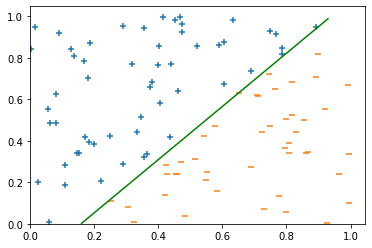

In [31]:
# n samples. Each sample includes: x0=1, x1, x2
x = rand(n,3) #* n
x[:,0] = 1

#The target weight vector the PLA is going to search for
w_star = w_star_gen_2d()
print('w_star: \n', w_star)

print(x)
#create the label array
y = np.sign(x @ w_star)
for i in range(n):
    if y[i] == 0:
        x[i,2] = x[i,2] + 0.1 # adjust the sample to make sure the sample is not on the w_star line.
        y[i] = np.sign(x[i] @ w_star)


# ---------------------------------        
# mess up mess_percent of the samples to test pocket pla      
if messed: 
    for i in range(math.floor(n * mess_percent)):
        r = math.floor(rand()*n)
        y[r] = y[r] * (-1)
# ---------------------------------        

    
# separate + and - samples for plotting     
pos = np.empty([1,3])
neg = np.empty([1,3])
for i in range(n):
    if y[i] == 1:
        pos = np.insert(pos, 0, x[i], 0)
    else: 
        neg = np.insert(neg, 0, x[i], 0)
# delete the init/useless row which is on the bottom        
pos = np.delete(pos, -1, 0)
neg = np.delete(neg, -1, 0)


# display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,1], pos[:,2], marker='+')
plt.scatter(neg[:,1], neg[:,2], marker='_')

display_w_2D(w_star, color = 'green')

#plt.xlabel('x1')
#plt.ylabel('x2')
#plt.show()

In [16]:
print('misclassified counts:', perceptron.error(x[:,1:],y))
print('\n')

misclassified counts: 1




w:
 [[ 0.19824475]
 [-2.68884774]
 [ 2.39453825]]
[[ 0.15180317]
 [-0.95712564]
 [ 0.74717704]]


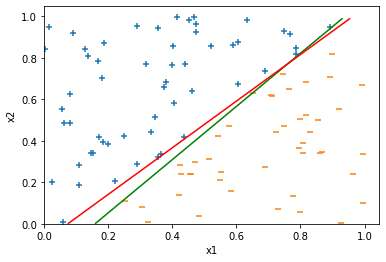

[-1.]
[-1.]
[1.]
[-1.]
[1.]
[1.]
[1.]
[-1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.]
[-1.]
[1.]
[1.]
[1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
[1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
[1.]
[-1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[1.]
[-1.]
[1.]
[1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
[1.]
[-1.]
[1.]
[1.]
[-1.]
[1.]
[1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.]
[-1.]
[-1.]
[-1.]
[-1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[1.]
[-1.]
[1.]
[-1.]
[-1.]
[1.]
[1.]
[1.]
[[-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]
 [-1.]
 [-1.]
 [ 1.]
 [ 1.]


In [109]:

perceptron = PLA()
messed = True
if messed:     
    perceptron.fit(x[:,1:], y, pocket=True, epochs = 5)
else:
    perceptron.fit(x[:,1:], y, pocket=False)
    
print('w:\n', perceptron.w)

print(w_star)

## display the data samples and the target classifier that PLA is tring to learn
plt.scatter(pos[:,1], pos[:,2], marker='+')
plt.scatter(neg[:,1], neg[:,2], marker='_')
##

display_w_2D(w_star, color = 'green')
display_w_2D(perceptron.w, color = 'red')
perceptron.error(x[:,1:], y)
##
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

print(perceptron.predict(x[:,1:]))
##

In [108]:
# >>>>>>>>>>>>> Jordan Driscoll 905812
 
# Implementation of the perceptron learning algorithm. Support the pocket version for linearly unseparatable data.
 
 
 
# NOTE: Your code need to vectorize any operation that can be vectorized.
 
import numpy as np
 
# 1) Training
# 2) After Training: Future Sample and Tell the Label
# 3) New Data Set whose label is known nad you want ot check if ml is doing good job or not ship it and it'll say
 
class PLA:
   
    # this is going to go ahead and initialize the class creating 
    # the member w which will be the line produced by the algorithm 
    def __init__(self):
        self.w = None
        
    # this is gonna take a array of points 
    # it's also gonna take their predetermined values
    # pocket --> true: it's gonna be imperfect and only have time limit to have a line
    # pocket --> false: it should output a perfect value 
    # epohcs --> the limit of times that it's alloewed to loop through 
    def fit(self, X, y, pocket = True, epochs = 100):
        # this is gonna insert an array of 1s into the X matrix value such that it can be used w/ d+1 dimensinoal w  
        X = np.insert(X, [0], 1, axis=1)
        # generates a random array 
        self.w = np.random.rand(len(X[0]),1)
        
        # if pocket is false it's gonna be a perfect line 
        if(pocket == False):  
            isMisclassified = True
            # if there is an error try to fix it 
            while(isMisclassified):
                # initially assume there is no error 
                isMisclassified = False
            
                #go through all of the x values and all of the y values 
                for x, y_i in zip(X, y):
                    if(np.sign(x @ self.w) != y_i[0]):
                        self.w = self.w + (y_i * x).reshape(-1, 1)
                        isMisclassified = True
        # if pocket is true the line will be as good as it can be 
        else:
            # this is gonna be the optimal line given the number of permitted loops 
            w_star = self.w
            min_error = len(X) + 1
            # while it still has a chance to run 
            while(epochs > 0 and min_error != 0):
                
                #reset curr error 
                curr_error = 0
                
                #go through all of the x values and all of the y values 
                for x, y_i in zip(X, y):
                    
                    # Check if this current value is misclassified 
                    if(np.sign(x @ self.w) != y_i[0]):
                        
                        #if it is misclassified adjust w 
                        self.w = self.w + (y_i * x).reshape(-1, 1)
                        
                        #increment curr erorr 
                        curr_error += 1 
                        
                # After it has gone through all of them it will
                #check if the current minimum error is greater than the curr error 
                if(min_error > curr_error):
                    # the current w_star will be set to current w 
                    w_star = self.w 
                    # the new min error will be updated 
                    min_error = curr_error 
                    # the epochs will go down 
                    epochs -= 1
            
           
    
    
    
    
    # X @ self.w --> New matrix tha tis n x 1 and everything there is a number where you do np.sign(to vector) which gives you new vector where everything is psotive negtive or 0
    def predict(self, X):
        X = np.insert(X, [0], 1, axis=1)
        out = np.empty((len(X), 1))
        i = 0
        for x in X:
            out[i] = np.sign(x @ self.w)
            #print(np.sign(x @ self.w))
            print(out[i])
            i+= 1
 
        return out
 
    # Finds the line's current number of errors
    def error(self, X, y):
        X = np.insert(X, [0], 1, axis=1)
        errors = 0
        for x, y_i in zip(X, y):
     
            if(np.sign(x @ self.w) != y_i[0]):
                errors += 1
            
        return errors 
        #X: n x d matrix, representing n samples and each has d features, excluding the bias feature.
        #y: n x 1 vector, representing the n labels of the n samples in X. Each label is +1 or -1.
           
        #return: the number of samples in X that are misclassified by the classifier
           
         #   Note: we count a sample x that sits right on the classifier, x^T w = 0, as a misclassified one.
     
       
        # add your code here
       
        # Hint: use matrix/vector operation to get predicated label vector in one shot of code.
        #       Then use vector comparison to compare the given label vector and
        #       the predicted label vector, along with the help from the numpy.sum function
        #       to count the #misclassified quickly. 
